#### 硬投票

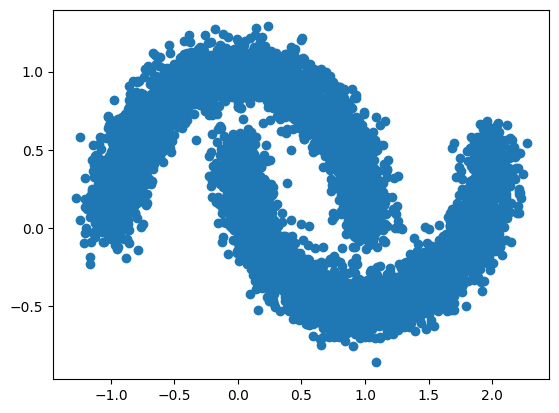

In [2]:
# 数据加载
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
X,y = make_moons(n_samples=7000,noise=0.1)
plt.scatter(X[:,0],X[:,1])

In [6]:
# 2）划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# 3）三个基分类器
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC(probability=True)

# 4）投票分类器
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(
    estimators = [('lr',lr),('rf',dt),('svc',svm)],
    voting = 'soft'
)

# 5）各分类器的准确率
from sklearn.metrics import accuracy_score
for clf in (lr,dt,svm,voting):
    clf.fit(X_train,y_train)
    y_hat = clf.predict(X_test)
    print(clf.__class__.__name__,'=',accuracy_score(y_test,y_hat))

LogisticRegression = 0.8805714285714286
DecisionTreeClassifier = 0.9982857142857143
SVC = 0.9994285714285714
VotingClassifier = 0.9988571428571429
